# ECE C247 - Neural Networks & Deep Learning, EEG Project
## Alexie Pogue, Amir Omidfar, Eric Peltola, Kenny Chen

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Parameters

In [0]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Data Setup

## Load Data

In [4]:
data_path = "/content/drive/Shared drives/ECE C247 Project/data/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[6], verbose=True)

Training/Valid data shape: (236, 22, 1000)
Test data shape: (49, 22, 1000)


## Preprocessing

In [0]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [0]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.49916
	Train loss: 0.04451, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02908, Accuracy: 14/48 (29.17%)
	Test loss: 0.02852, Accuracy: 9/49 (18.37%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.40510
	Train loss: 0.04435, Accuracy: 54/188 (28.72%)
	Validation loss: 0.02935, Accuracy: 9/48 (18.75%)
	Test loss: 0.02851, Accuracy: 9/49 (18.37%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.32209
	Train loss: 0.04410, Accuracy: 59/188 (31.38%)
	Validation loss: 0.02950, Accuracy: 7/48 (14.58%)
	Test loss: 0.02871, Accuracy: 7/49 (14.29%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.38707
	Train loss: 0.04362, Accuracy: 56/188 (29.79%)
	Validation loss: 0.02980, Accuracy: 7/48 (14.58%)
	Test loss: 0.02873, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.33190
	Train loss: 0.04399, Accuracy: 51/188 (27.13%)
	Validation loss: 0.03039, Accuracy: 7/48 (14.58%)
	Test loss: 0.02882, Acc

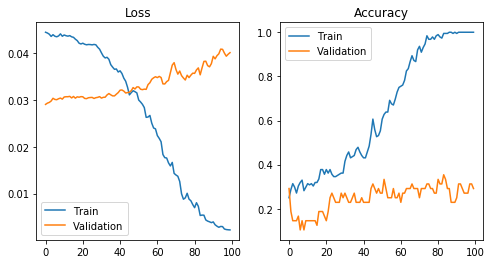

In [7]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.50018
	Train loss: 0.04424, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02917, Accuracy: 6/48 (12.50%)
	Test loss: 0.02829, Accuracy: 15/49 (30.61%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.45499
	Train loss: 0.04423, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02967, Accuracy: 6/48 (12.50%)
	Test loss: 0.02832, Accuracy: 15/49 (30.61%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.26923
	Train loss: 0.04410, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02983, Accuracy: 6/48 (12.50%)
	Test loss: 0.02834, Accuracy: 15/49 (30.61%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.34104
	Train loss: 0.04377, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02966, Accuracy: 8/48 (16.67%)
	Test loss: 0.02823, Accuracy: 14/49 (28.57%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.38620
	Train loss: 0.04314, Accuracy: 63/188 (33.51%)
	Validation loss: 0.02968, Accuracy: 8/48 (16.67%)
	Test loss: 0.02820, A

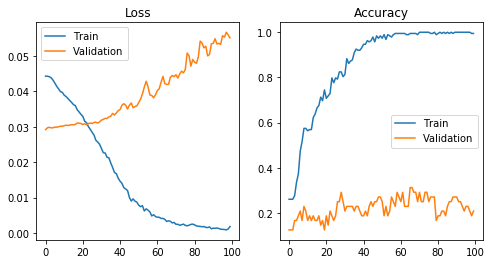

In [8]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## GRU

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.52566
	Train loss: 0.04460, Accuracy: 45/188 (23.94%)
	Validation loss: 0.02829, Accuracy: 16/48 (33.33%)
	Test loss: 0.02834, Accuracy: 14/49 (28.57%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.42604
	Train loss: 0.04429, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02830, Accuracy: 18/48 (37.50%)
	Test loss: 0.02838, Accuracy: 11/49 (22.45%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.33947
	Train loss: 0.04368, Accuracy: 57/188 (30.32%)
	Validation loss: 0.02864, Accuracy: 15/48 (31.25%)
	Test loss: 0.02829, Accuracy: 14/49 (28.57%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.31584
	Train loss: 0.04280, Accuracy: 69/188 (36.70%)
	Validation loss: 0.02908, Accuracy: 11/48 (22.92%)
	Test loss: 0.02854, Accuracy: 12/49 (24.49%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.42803
	Train loss: 0.04192, Accuracy: 82/188 (43.62%)
	Validation loss: 0.02953, Accuracy: 10/48 (20.83%)
	Test loss: 0.028

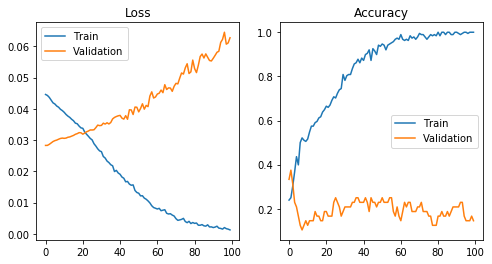

In [9]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + LSTM

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.37618
	Train loss: 0.04427, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02867, Accuracy: 10/48 (20.83%)
	Test loss: 0.02869, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.36949
	Train loss: 0.04423, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02875, Accuracy: 10/48 (20.83%)
	Test loss: 0.02866, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.36664
	Train loss: 0.04420, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02883, Accuracy: 10/48 (20.83%)
	Test loss: 0.02864, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.36573
	Train loss: 0.04418, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02890, Accuracy: 10/48 (20.83%)
	Test loss: 0.02862, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.36386
	Train loss: 0.04416, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02897, Accuracy: 10/48 (20.83%)
	Test loss: 0.028

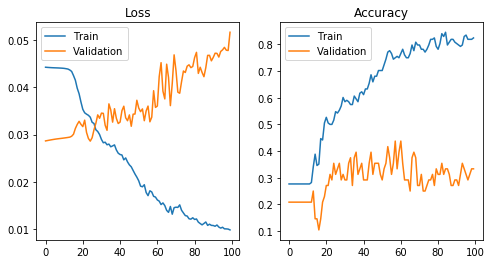

In [10]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + GRU

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.40807
	Train loss: 0.04426, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02913, Accuracy: 10/48 (20.83%)
	Test loss: 0.02832, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.37408
	Train loss: 0.04413, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02914, Accuracy: 10/48 (20.83%)
	Test loss: 0.02830, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.36951
	Train loss: 0.04397, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02909, Accuracy: 10/48 (20.83%)
	Test loss: 0.02830, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.35967
	Train loss: 0.04373, Accuracy: 56/188 (29.79%)
	Validation loss: 0.02896, Accuracy: 12/48 (25.00%)
	Test loss: 0.02830, Accuracy: 12/49 (24.49%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.35110
	Train loss: 0.04344, Accuracy: 68/188 (36.17%)
	Validation loss: 0.02876, Accuracy: 15/48 (31.25%)
	Test loss: 0.028

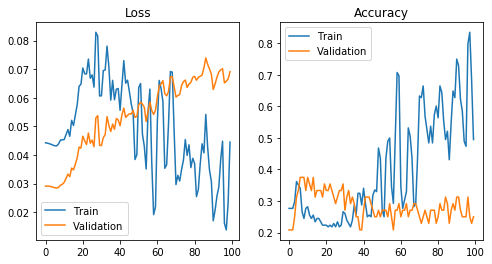

In [11]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)